## What are the characteristics of the most valuable customer segments in the mall, and how can we target them more effectively with marketing campaigns?

### Can we identify any patterns in customer behavior based on demographics such as gender, age, and income?
### Are there any correlations between customer spending and store visits or time spent in the mall?
### Can we predict customer spending behavior based on historical data and demographics?
### How can we use customer segmentation to optimize store layouts and product placements?
### Can we identify any high-value customer segments that warrant special attention and promotions?

### we will try to form a group/cluster on the basis of their age, annual income and spending score. By doing these we would be able to focus on marketing strategy for the respective group of people. 

In [1]:
import numpy as np  # mathematical operations on arrays and matrices
import pandas as pd # data manipulation and analysis
import seaborn as sns # data visualization and plotting
from sklearn.cluster import KMeans # clustering analysis using KMeans algorithm
import warnings 
warnings.filterwarnings("ignore") # ignoring any warnings that may occur during the analysis
from matplotlib import pyplot as plt # creating visualizations and plots
%matplotlib inline 
# magic command for Jupyter Notebook that allows the plots to be displayed inline within the notebook.

In [2]:
# reading a CSV file named "Mall_Customers.csv" located in the path "C:\Users\niraj\Downloads" and storing the data in a pandas DataFrame called "mall_df".
mall_df = pd.read_csv(r"C:\Users\niraj\Downloads\Mall_Customers.csv")

In [3]:
# displaying the first five rows of the Mall Customers dataset
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# checking null values in the mall customer dataset
mall_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# checking duplicates value in the dataset
mall_df.duplicated().sum()

0

In [6]:
# checking shape of the datset
mall_df.shape

(200, 5)

In [7]:
# printing information about the mall_df DataFrame,
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# Selecting the columns we want to include in the correlation matrix
columns_to_correlate = ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']

# Calculating the correlation matrix for only continous value
correlation_matrix = mall_df[columns_to_correlate].corr()

# Printing the correlation matrix
print(correlation_matrix)

                        Annual Income (k$)  Spending Score (1-100)       Age
Annual Income (k$)                1.000000                0.009903 -0.012398
Spending Score (1-100)            0.009903                1.000000 -0.327227
Age                              -0.012398               -0.327227  1.000000


<Axes: >

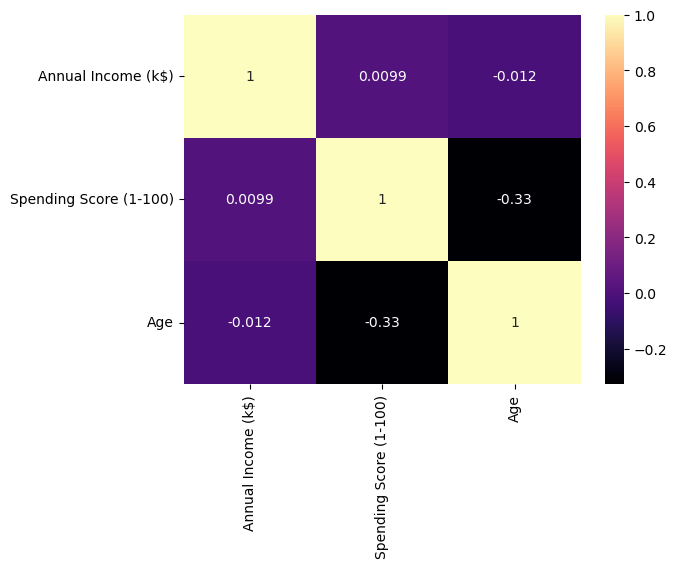

In [9]:
# plotting heatmap to check the correlation
sns.heatmap(correlation_matrix, annot=True, cmap='magma')

### All of these variables are moderately correlated with each other. so we will perofor clustering on the basis of these features. 
### we will extract 3 features and 2 features and will perform clustering two different times with different methods.

In [10]:
# extracting all rows and columns 2, 3 and 4 from the DataFrame mall_df and assigns the resulting array to z.
z = mall_df.iloc[:,[2,3,4]].values

In [11]:
z

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [12]:
# extracting all rows and columns 3 and 4 from the DataFrame mall_df and assigns the resulting array to x.
x = mall_df.iloc[:,[3,4]].values

In [13]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [14]:
# initializing an empty list to store the within-cluster sum of squares (WCSS) values for different numbers of clusters.
wcss =[]
# setting up a for loop that will run for the range of values from 1 to 9
for i in range (1,11):
   # createing a KMeans clustering model with i clusters, using the k-means++ initialization method and a random state of 42 for consistency
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    # fitting the KMeans model to the data.
    km.fit(x)
    #  appending the WCSS value of the fitted KMeans model to the list initialized earlier
    wcss.append(km.inertia_)

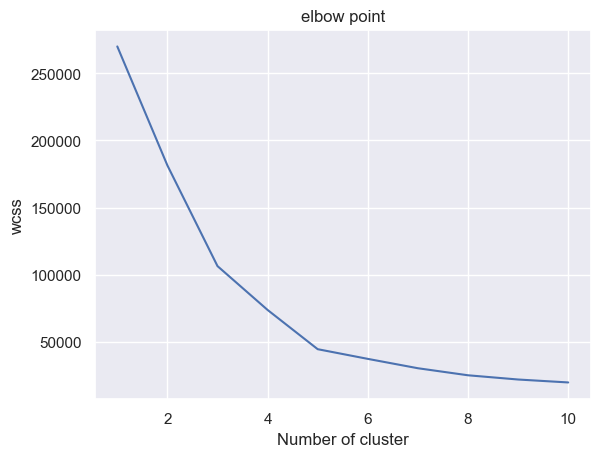

In [15]:
# plotting the elbow graph for all the clusters recored in the wcss
sns.set()
plt.plot(range(1,11),wcss)
plt.title('elbow point')
plt.xlabel('Number of cluster')
plt.ylabel('wcss')
plt.show()

### We decided to choose 5 number of clusters for the analysis on the basis of elbow diagram we achieved.

In [16]:
# creating a KMeans object with 5 clusters, using the "k-means++" initialization method
km = KMeans(n_clusters=5, init='k-means++', random_state=42)
#  fitting the model to the input data 'x' and making predictions for the cluster labels of each data point
y = km.fit_predict(x)    

In [17]:
y

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

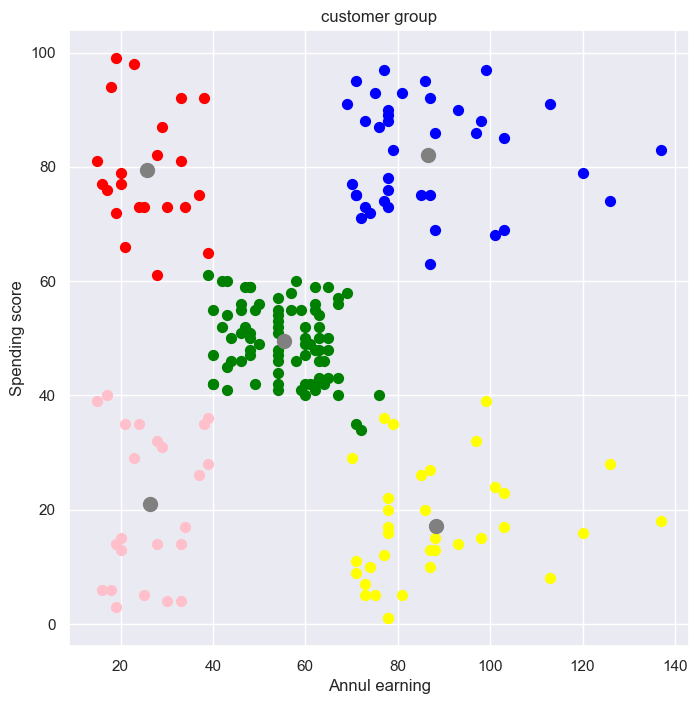

In [18]:
# creating a scatter plot of the clustered data points
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0], x[y==0,1], s=50, c='green', label='cluster1 ' )
plt.scatter(x[y==1,0], x[y==1,1], s=50, c='yellow', label='cluster2 ' )
plt.scatter(x[y==2,0], x[y==2,1], s=50, c='pink', label='cluster3 ' )
plt.scatter(x[y==3,0], x[y==3,1], s=50, c='red', label='cluster4 ' )
plt.scatter(x[y==4,0], x[y==4,1], s=50, c='blue', label='cluster5 ' )

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=100, c='gray', label='centroid')
plt.title('customer group')
plt.xlabel('Annul earning')
plt.ylabel('Spending score')
plt.show()

### From this scatter plot we can clearly see that, there are five different groups have been formed with five different clusters. We can check, how efficent is the cluster can perform by a metrics called silhouette_score. This score more than 0.5 are generally considered that data points have assigned to right clusters. 

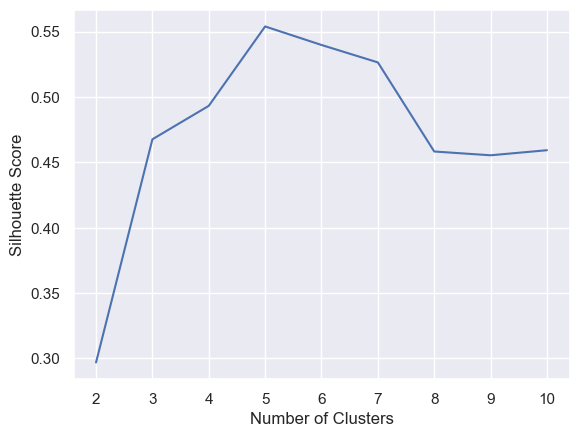

In [19]:
from sklearn.metrics import silhouette_score
# performing clustering for different number of clusters
silhouette_scores = []
for p in range(2, 11):
    clusterer = KMeans(n_clusters=p, random_state=42)
    cluster_labels = clusterer.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# plotting silhouette scores for different number of clusters
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

### In general, a silhouette value more than 0.55 is regarded as an excellent result for clustering. It suggests that the groups have a modest amount of overlap, are fairly dense, and are well spaced from one another. This indicates that the data were effectively divided into useful categories by the clustering method.

## Now, we will perform the clustering with three variables and scaling the varibales to apply kmeans clustering.

In [20]:
# creating new dataframe with three features age,annual income and spending score
new_mall = pd.DataFrame(z)

In [21]:
# reading first few rows of dataset new_mall
new_mall.head()

,0,1,2
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [22]:
# renaming the column name 
df = new_mall.rename(columns={0: 'age', 1: 'annual_income', 2: 'spending_score'})

In [23]:
df.head()

,age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [24]:
# initializing an empty list to store the within-cluster sum of squares (WCSS) values for different numbers of clusters.
wcss1 =[]
# setting up a for loop that will run for the range of values from 1 to 9
for i in range (1,11):
   # createing a KMeans clustering model with i clusters, using the k-means++ initialization method and a random state of 42 for consistency
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    # fitting the KMeans model to the dataframe z.
    km.fit(z)
    #  appending the WCSS value of the fitted KMeans model to the list initialized earlier
    wcss1.append(km.inertia_)

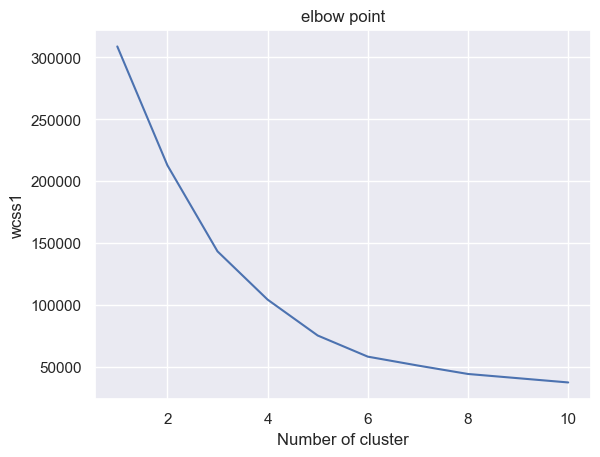

In [25]:
# plotting the elbow graph for all the clusters recored in the wcss
sns.set()
plt.plot(range(1,11),wcss1)
plt.title('elbow point')
plt.xlabel('Number of cluster')
plt.ylabel('wcss1')
plt.show()

### We decided to choose 5 number of clusters for the analysis on the basis of elbow diagram we achieved.

In [26]:
# creating a KMeans object with 5 clusters, using the "k-means++" initialization method
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
#  fitting the model to the input data 'x' and making predictions for the cluster labels of each data point
y = kmeans.fit_predict(z)    

labels = kmeans.labels_
centers = kmeans.cluster_centers_

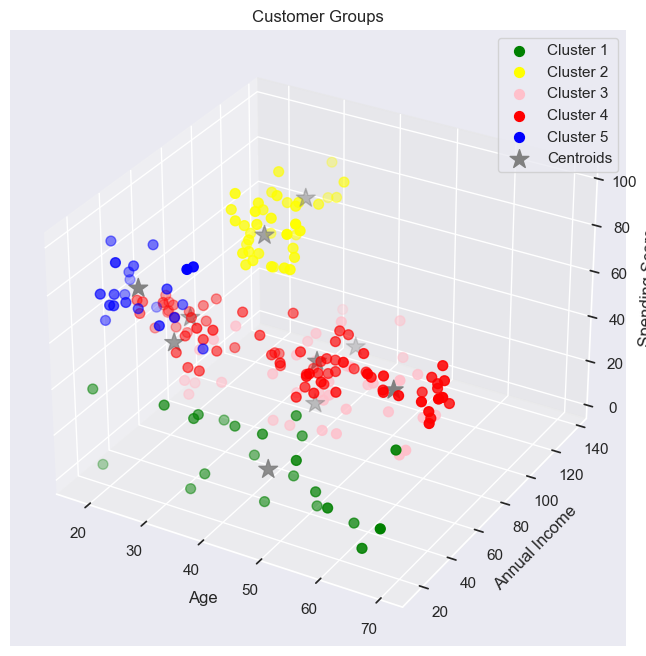

In [27]:
# Creating a new figure with a 3D axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the data points for each cluster
colors = ['green', 'yellow', 'pink', 'red', 'blue']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

# creating (scatter plot) loop through each cluster (i), and plotting the data points corresponding to that cluster.
for i in range(len(labels)):
    ax.scatter(z[y==i,0], z[y==i,1], z[y==i,2], s=50, c=colors[i], label=labels[i])

# Plotting the centroids
ax.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], km.cluster_centers_[:,2], s=200, marker='*', c='gray', label='Centroids')

# Setting the axes labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
ax.set_title('Customer Groups')

# Adding a legend
ax.legend()

# Showing the plot
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler

# Creating a StandardScaler object
scaler = StandardScaler()

# Standardize the selected features
df1 = scaler.fit_transform(df)

In [29]:
df1

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [30]:
# creating a KMeans object with 6 clusters, using the "k-means++" initialization method
kmeans2 = KMeans(n_clusters=6, init='k-means++', random_state=42)
#  fitting the model to the input data 'x' and making predictions for the cluster labels of each data point
y2 = kmeans2.fit_predict(df1)    

labels2 = kmeans2.labels_
centers2 = kmeans2.cluster_centers_

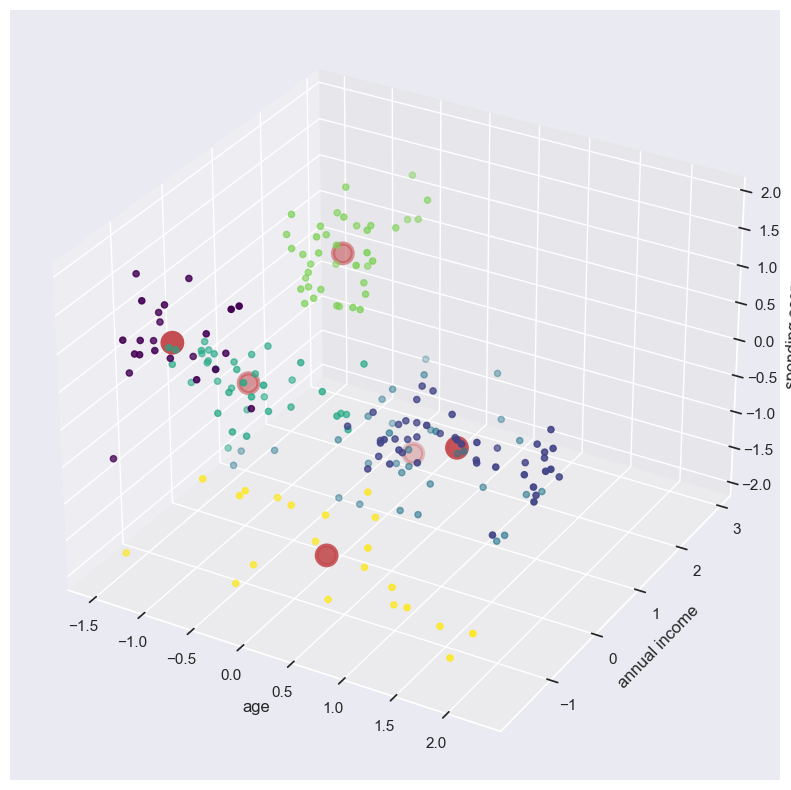

In [31]:
# creating a 3D scatter plot of the data colored by cluster label
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1[:, 0], df1[:, 1], df1[:, 2], c=labels2, cmap='viridis')
ax.set_xlabel('age')
ax.set_ylabel('annual income')
ax.set_zlabel('spending score')

# adding the cluster centers to the plot as red spheres
ax.scatter(centers2[:, 0], centers2[:, 1], centers2[:, 2], marker='o',
           s=200, linewidths=3, color='r', zorder=10)
plt.show()

In [32]:
# calculating the mean and standard deviation of each feature
mean = np.mean(z, axis=0)
sd = np.std(z, axis=0)

# scale the data using Mean and SD scaling
scaled_data = (z - mean) / sd

In [33]:
# creating a KMeans object with 6 clusters, using the "k-means++" initialization method
kmeans3 = KMeans(n_clusters=6, init='k-means++', random_state=42)
#  fitting the model to the input data 'x' and making predictions for the cluster labels of each data point
y3 = kmeans3.fit_predict(scaled_data)    

labels3 = kmeans3.labels_
centers3 = kmeans3.cluster_centers_

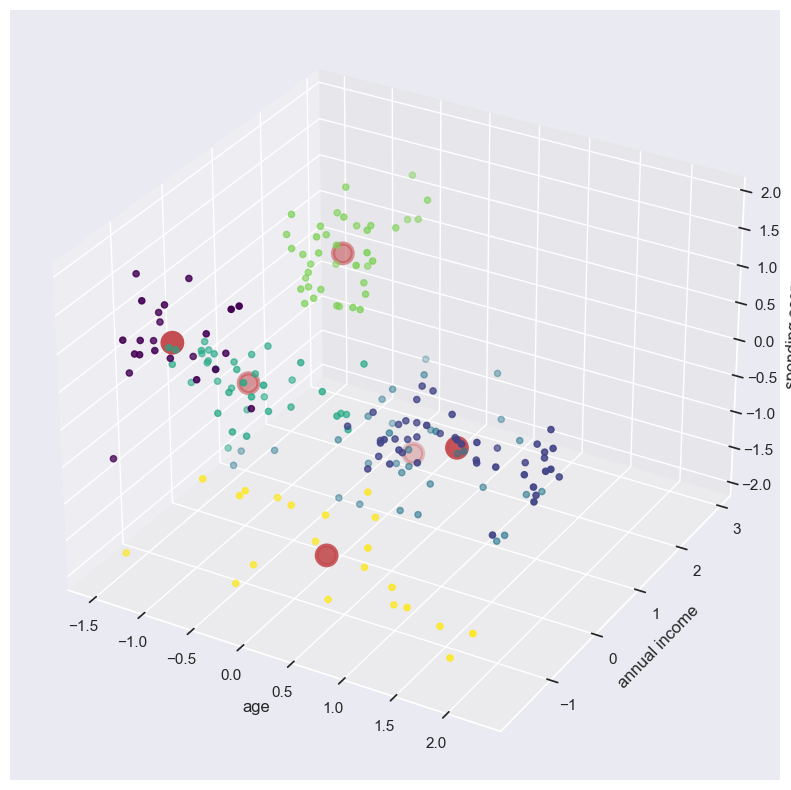

In [34]:
# creating a 3D scatter plot of the data colored by cluster label
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_data[:, 0], scaled_data[:, 1], scaled_data[:, 2], c=labels3, cmap='viridis')
ax.set_xlabel('age')
ax.set_ylabel('annual income')
ax.set_zlabel('spending score')

# adding the cluster centers to the plot as red spheres
ax.scatter(centers3[:, 0], centers3[:, 1], centers3[:, 2], marker='o',
           s=200, linewidths=3, color='r', zorder=10)
plt.show()

### It is evident from the multidimensional graph we produced that the groups for yellow, green, violet, and light green have been allocated explicitly and are not overlapping. However, points with light blue and blue are overlapped, indicating that they are not placed in the appropriate categories or that their centroids are near to one another.

## After plotting the result into grapgh, we will check with silhouette_score metrics how well points are allocates in different group.

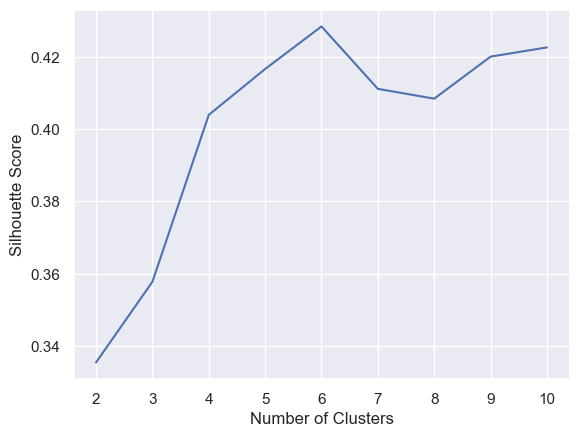

In [35]:
from sklearn.metrics import silhouette_score
# perform clustering for different number of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# plot silhouette scores for different number of clusters
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

## A silhouette score of 0.42 indicates that the clustering is somewhat dense and well separated, but there may be some overlapping between clusters. 